# 0.0 IMPORTS

In [71]:
import pandas as pd
import numpy  as np
import seaborn as sns
import sklearn

from sklearn                 import metrics as m
from sklearn                 import preprocessing   as pp
from sklearn.model_selection import train_test_split
from keras                   import models as ml
from keras                   import layers as l
from scipy                   import stats  as ss
from matplotlib              import pyplot as plt
from IPython.display         import Image
from IPython.core.display    import HTML
from scikitplot              import metrics as mt


## 0.1 Helper Functions


In [2]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


##  0.2 Load dataset

In [3]:
df_raw = pd.read_csv('C:/Users/Djalma.junior/DS/Airbnb/datasets/train.csv')

#  1.0 DESCRICAO DOS DADOS


In [4]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [5]:
df1.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

## 1.2. Data Dimensions

In [6]:
print ('Number of columns {}'.format(df1.shape[1]))
print ('Number of rows {}'.format(df1.shape[0]))

Number of columns 16
Number of rows 213451


## 1.3. Data Types

In [7]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.4. Check NA

In [9]:
df1.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

## 1.5 Change NA

In [19]:
df1.sample().T

,142983
id,fmn0zwuubn
date_account_created,2014-01-17 00:00:00
timestamp_first_active,2014-01-17 16:29:28
date_first_booking,2014-01-17 00:00:00
gender,FEMALE
age,52
signup_method,basic
signup_flow,0
language,en
affiliate_channel,direct


In [13]:
#date_account_created  
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

#timestamp_first_active    
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format = ('%Y%m%d%H%M%S'))

#date_first_booking  
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

#age
df1['age'] = df1['age'].astype(np.int64)


## 1.6 Check Balanced Data

In [15]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

#  2.0 FILTRAGEM DE VARIÁVEIS


In [16]:
df2=df1.copy()

## 2.1 Filtering Row

## 2.2 Columns Selection

# 3.0 DATA PREPARATION

In [57]:
df3 = df2.copy()

In [58]:
# dummy variable
df3_dummy = pd.get_dummies( df3.drop( ['id', 'country_destination'], axis=1 ) )

# join id and country destination
df3 = pd.concat( [df3[['id', 'country_destination']], df3_dummy], axis=1 )

# 4.0 FEATURE SELECTION


In [59]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking'] # original dates
df4 = df3.drop( cols_drop, axis=1 )

In [60]:
df4.sample().T

,114577
id,dfsc3vdu9l
country_destination,US
age,68
signup_flow,0
gender_-unknown-,0
gender_FEMALE,0
gender_MALE,1
gender_OTHER,0
signup_method_basic,1
signup_method_facebook,0


# 5.0 Machine Learning Model - Neural Network MLP



In [61]:
df5 = df4.copy()


In [62]:
# split dataset into training  and test data
X = df4.drop('country_destination', axis=1)
y = df4['country_destination'].copy()


X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.20, random_state=32 )

df5 = pd.concat( [X_train, y_train], axis=1 )

In [63]:
x_train = X_train.drop( 'id', axis=1 )
x_validation = X_validation.drop( 'id', axis=1 )

In [64]:
x_train.shape[1]

112

In [65]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()

In [66]:
# model definition
model = ml.Sequential()
model.add( l.Dense( 128, input_dim=x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 11, activation='softmax') )

# model compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# train model
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
1705/1705 [==============================] - 3s 1ms/step - loss: 1.2792 - accuracy: 0.7047: 0s - loss: 1.2900 - accura
Epoch 2/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2222 - accuracy: 0.7084: 0s - loss: 1
Epoch 3/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2072 - accuracy: 0.7085
Epoch 4/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1867 - accuracy: 0.7085
Epoch 5/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1720 - accuracy: 0.7085
Epoch 6/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1590 - accuracy: 0.7088
Epoch 7/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1528 - accuracy: 0.7088
Epoch 8/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1471 - accuracy: 0.7088
Epoch 9/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1398 - accuracy: 0.7088: 0s - loss: 1.1426 - ac
Epoch 1

1705/1705 [==============================] - 2s 967us/step - loss: 1.0993 - accuracy: 0.7120
Epoch 78/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0992 - accuracy: 0.7120
Epoch 79/100
1705/1705 [==============================] - ETA: 0s - loss: 1.0977 - accuracy: 0.71 - 2s 1ms/step - loss: 1.0992 - accuracy: 0.7119
Epoch 80/100
1705/1705 [==============================] - 2s 977us/step - loss: 1.1001 - accuracy: 0.71160s -
Epoch 81/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0990 - accuracy: 0.7122
Epoch 82/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0995 - accuracy: 0.7119
Epoch 83/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0984 - accuracy: 0.7120
Epoch 84/100
1705/1705 [==============================] - 2s 934us/step - loss: 1.0984 - accuracy: 0.7122
Epoch 85/100
1705/1705 [==============================] - 2s 941us/step - loss: 1.0975 - accuracy: 0.7120
Epoch 86/100
1705/1705 

## 5.1 NN PERFORMANCE


In [68]:
# PREDICTION 
pred_nn = model.predict(x_validation)

# INVERT PRED
yhat_nn=ohe.inverse_transform(pred_nn)

# PREDICTION PREPARE
y_test_nn = y_validation.to_numpy()
yhat_nn = yhat_nn.reshape (1, -1)[0]

Accuracy: 0.7020902090209021


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

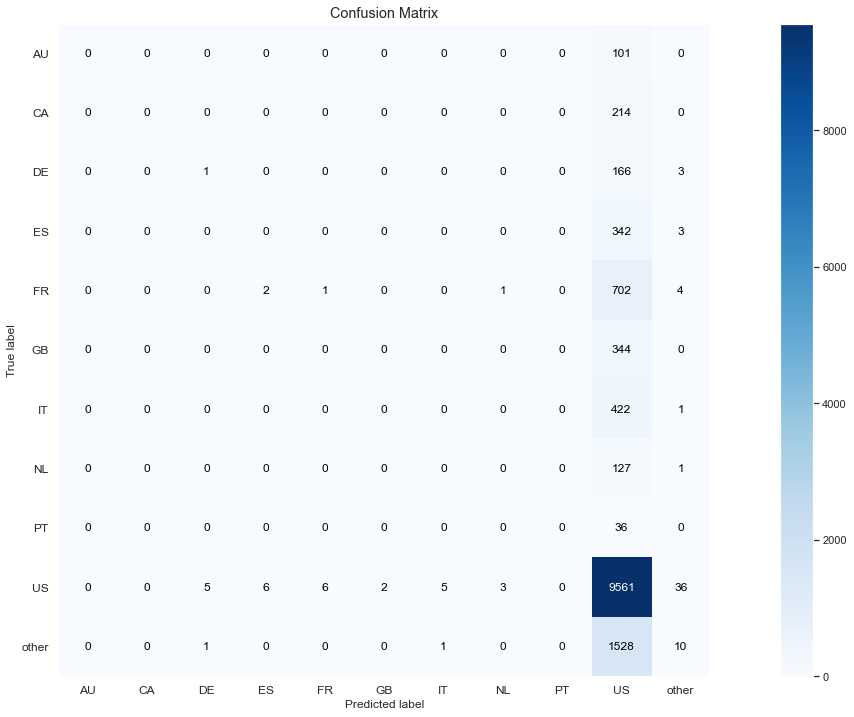

In [73]:
# accuracy 
acc_nn = m.accuracy_score(y_test_nn, yhat_nn)
print ('Accuracy: {}'.format(acc_nn))

# confusion matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize = False)


# 4.0 ANALISE EXPLORATORIA DOS DADOS

## 4.1. Analise Univariada


## 4.2 Analise Bivariada


## 4.3 Analise Multivariada

# 5.0 PREPARACAO DE DADOS


## 5.1 Standardization

##  5.2 Rescaling


## 5.3 Transformation


### 5.3.1 Encoding

## 5.4 Validation Prep

# 6.0  FEATURE SELECTION


## 6.1 Boruta Feature Selector


## 6.2 Feature Importance

# 7.0 MACHINE LEARNING


## 7.9 Compare Model's Performance

### 7.9.1. Single Performance

### 7.9.2. Real Performance - Cross Validation


# 8.0. HYPERPARAMETER FINE TUNING


## 8.3 Final Model


# 9.0 Business Performance


# 10.0 Deploy to Production

## 10.1 Class


## 10.2 API Handler

## 10.3 API Tester

# 2.0 FEATURE ENGINEERING